In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk import sent_tokenize

In [2]:
data=pd.read_csv('twitter4.csv',header=None,encoding='latin-1')

In [3]:
twitter=data[:100000]

In [4]:
test=data[100000:100010]

In [5]:
twitter.head(5)

,0,1,2,3,4,5,6
0,1156929,4,1979139255,Sun May 31 01:47:50 PDT 2009,NO_QUERY,Lily_scandalous,@matthewmoloney Thankyou for the follow
1,1142273,4,1977283844,Sat May 30 20:35:09 PDT 2009,NO_QUERY,ImaPacifist,Summer is coming so sweetly like cinammon pea...
2,1184524,4,1982617220,Sun May 31 11:33:58 PDT 2009,NO_QUERY,LadyProducHer,@ZaraGreen yum now Jambalaya sounds good...
3,1485313,4,2067838949,Sun Jun 07 13:02:55 PDT 2009,NO_QUERY,FrecklesRN,@Dotseoem you're hilarious!
4,1072848,4,1966653892,Fri May 29 18:09:22 PDT 2009,NO_QUERY,PrincessMappy,Good music good friends and a good man. Life i...


In [6]:
sen=twitter[6]

In [7]:
len(sen)

100000

In [8]:
sent=[sen[i].lower() for i in range(len(twitter))]

In [9]:
sent[2]

'@zaragreen yum now jambalaya sounds good... '

In [10]:
tag=twitter[1]

In [11]:
tag[2]

4

In [12]:
def p(v):
    temp=len(tag[tag==v])
    prob=temp/(len(twitter))
    return prob

In [13]:
len(tag[tag==0])

49996

In [14]:
p(0)

0.49996

In [15]:
p(4)

0.50004

In [16]:
def concatData(size):  #maximum size is 15
    ls={}
    for i in range(size):
        ls["l{}".format(i)]=''
        for s in sent[i*100000:(i+1)*100000]:
            ls["l{}".format(i)]=s+ls["l{}".format(i)]
    l=''
    for i in range(size):
        l=ls['l{}'.format(i)]+l
    return l

In [17]:
l=concatData(4)

In [18]:
sent[2]

'@zaragreen yum now jambalaya sounds good... '

In [19]:
#twitter=pd.read_csv('twitter.csv',header=None,encoding='latin-1')

In [20]:
#twitt5=twitter.sample(n=100000)

In [21]:
#tag=twitt5[1]
#sent=twitt5[6]

In [22]:
#twitt5

In [23]:
def p(v):
    temp=len(tag[tag==v])
    prob=temp/(len(twitter))
    return prob

In [24]:
p(0)

0.49996

In [25]:
whole_sent=np.concatenate([sent])

In [26]:
whole_sent

array(['@matthewmoloney thankyou for the follow ',
       'summer is coming so sweetly like cinammon  peace and harmony.',
       '@zaragreen yum now jambalaya sounds good... ', ...,
       '@munkymunch you can have some of my noodles ',
       "yeah! just realized my bro bit the bullet &amp; joined twitter. he's not as interesting/random as me, but guess he's worth following @qb360  ",
       '@mrsvc_sp you rock '], dtype='<U717')

In [27]:
whole_sent[0]+whole_sent[1]

'@matthewmoloney thankyou for the follow summer is coming so sweetly like cinammon  peace and harmony.'

In [28]:
allsent=''
for i in range(len(twitter)):
    allsent=whole_sent[i].lower()+allsent

In [29]:
#allsent

In [ ]:
vocabulary=word_tokenize(allsent)

In [ ]:
vocabulary

In [ ]:
len(vocabulary)

In [ ]:
from nltk import FreqDist

In [ ]:
frdis1=FreqDist(vocabulary)

In [ ]:
frdis1.plot(10)

In [35]:
import re
s = "string With @Punctuation? and. @someone with #teeth in 1979 ate people!"

s2=re.sub('\w*[0-9,#]\w*|@\w*|\.|!', '', s)

In [36]:
s2

'string With ? and  with  in  ate people'

In [37]:
filter_all=re.sub('\w*[0-9,#]\w*|@\w*|[!,?,&,£]|\.', '', allsent)

In [38]:
#reg_twitt

In [39]:
new_all=nltk.word_tokenize(filter_all)

In [40]:
frdis2=FreqDist(new_all)

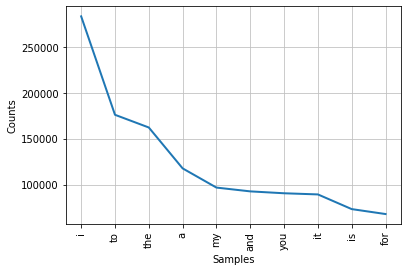

In [41]:
frdis2.plot(10)

In [42]:
dictionary=set(filter_all)

In [43]:
#len(whole_sent),len(twitter)

In [44]:
len(sent)

500000

In [45]:
dc={}
for i in range(len(whole_sent)):
    dc['s{}'.format(i)]=word_tokenize(whole_sent[i])

In [46]:
sen_0=[]
sen_4=[]
for i in range(len(whole_sent)):
    if tag[i]==0:
        sen_0.append(dc['s{}'.format(i)])
    elif tag[i]==4:
        sen_4.append(dc['s{}'.format(i)])

In [47]:
text_0=set(np.concatenate(sen_0))
text_4=set(np.concatenate(sen_4))

In [48]:
voc1=set(new_all)

In [49]:
def nk(word,given_tag,data):#total number of words whose tag is given_tag
    if word not in voc1:
        return 0
    else:
        word_in_sen=[((word in dc['s{}'.format(i)]) and (tag[i]==given_tag)) for i in range(len(data))]
        return sum(word_in_sen)
        

In [50]:
nk('@',4,twitter)

0

In [51]:
def n(given_tag):
    if given_tag==0:
        return len(text_0)
    elif given_tag==4:
        return len(text_4)
    else:
        return 0


In [52]:
def pr(w,given_tag,data):
    n_k=nk(w,given_tag,data)
    n_n=n(given_tag)
    prob=(n_k+1)/(n_n+len(voc1))
    return prob
    

In [53]:
pr('back',0,twitter)

0.02392007676025439

In [54]:
def sentiment(new,data):
    tkn=word_tokenize(new)
    p1=1
    q1=1
    for w in tkn:
        p1=p1*pr(w,0,data)
        q1=q1*pr(w,4,data)
    p1=p(0)*p1
    q1=p(4)*q1
    if p1>q1:
        return "Negative"
    else:
        return "Positive"

In [55]:
sentiment('i like movie',twitter)

'Negative'

In [56]:
sentiment("wow its warm tonight",twitter)

'Negative'

In [57]:
sentiment("I like this movie",twitter)

'Negative'

In [58]:
sentiment("hate",twitter)

'Negative'

In [59]:
sentiment("love",twitter)

'Positive'